<a href="https://colab.research.google.com/github/shivankb/Google-Playstore-EDA/blob/master/google_playstore_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Playstore Exploratory Data Analysis**

# **Project Summary**

The Google Play Store is a digital marketplace for mobile apps on the Android operating system. These apps now significantly influence how we live our lives. The goal of this project is to provide information that will assist developers better understand client needs and, in turn, help the product become more well-known. This includes analyzing the relationship between app ratings and download numbers, identifying the most popular app categories, or exploring the sentiment of app reviews. The project also includes visualizations to help communicate the findings and insights.

##The processes involved in this EDA include:

*1) Loading the data into data frame*\
*2) Cleaning the data*\
*3) Extracting statistics from the dataset*\
*4) Exploratory analysis and   visualizations*\
*5) Questions that can be asked from the dataset*\
*6) Conclusion*

**Data Preparation:**\
Cleaning and converting raw data before processing and analysis is data preparation. Prior to processing, it is a crucial phase that frequently entails data reformatting, data corrections, and the mixing of data sources to enrich data.

**Gathering data:**\
Understanding the data and what has to be done before the data is relevant in a given context are the goals of this step. Reading the CSV file and performing a preliminary statistical analysis can accomplish this.

We must verify the dataset even if it may appear to have the proper datatypes for each column. When addressing problems, inconsistent datatypes will exacerbate the situation.

**Cleanse and validate data:**\
This stage is essential for eliminating inaccurate data and completing gaps. Here are several key duties:

**Deleting unnecessary data**
completing blank values.
adjusting data to a predetermined pattern.


## *Let's examine what our datasets have:*

###**Playstore dataset:**
**App** - Name of the Application\
**Category** - Category of the Application\
**Rating** - Rating given to the Application\
**Reviews** - No of reviews given to the Application\
**Size** - Size of the Application\
**Installs** - No of downloads of the Application\
**Type** - Free or Paid\
**Price** - Price of the Application if it is paid\
**Content Rating**-It is Age appropriate or Not\
**Genres** - Type of Genre the Application belongs to\
**Last Updated** - When the last time the Application is Updated\
**Current Ver** - Current version of the Application\
**Android Version** - Minimum Android version required to run the Application

###**User review dataset:**

**App** - the name of the app the review is for\
**Translated_Review** - the text of the review (translated to English)\
**Sentiment** - the sentiment expressed in the review (positive, negative, or neutral)\
**Sentiment_Polarity** - a numerical score indicating the sentiment polarity (ranging from -1 to 1)\
**Sentiment_Subjectivity** - a numerical score indicating the sentiment subjectivity (ranging from 0 to 1)

# **Problem Statements**

1.  What is the percentage of free and paid Apps in the Play Store?
2.  Finding total number of Free vs Paid Apps depending on the category and the number of Installs?
3.  Finding Average Rating of each App Category.
4.  Obtaining Average Rating for each Genre .
5. Calculating the distribution of app Types based on the number of Installs and the Content Rating.
6.  How Sentiment Polarity varies with Type of app?
7.  Different percentages of sentiment analysis on top 3 Reviewed App Categories?
8.  Analysis of Sentiment for each app Category.


# **Let's Begin**

## *Starting with importing necessary packages and mounting the drive*

In [487]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px 

In [488]:
# Mounting CSV files from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [489]:
# Creating data files path and reading the csv files
playstore_df = pd.read_csv(r"/content/drive/MyDrive/Play Store Data(EDA 1)/Play Store Data.csv")
user_reviews_df = pd.read_csv(r"/content/drive/MyDrive/Play Store Data(EDA 1)/User Reviews.csv")

## *Viewing data set and structure of our databases*

In [490]:
# Exploring the Playstore Dataframe
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [491]:
## Exploring the User Dataframe

user_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## *Let's get our hands on the dataset*

In [492]:
# Extacting top 3 values from Playstore Dataframe
playstore_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [493]:
# Extacting last 3 values from Playstore Dataframe
playstore_df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [494]:
# Extacting top 3 values from user_reviews Dataframe
user_reviews_df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [495]:
# Extacting top 3 values from Playstore Dataframe
user_reviews_df.tail(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [496]:
#Lets take a quick run through the shape of Playstore dataframe and user_reviews dataframe

playstore_df.shape

(10841, 13)

In [497]:
user_reviews_df.shape

(64295, 5)

In [498]:
# Obtaining the Attributes from the columns of Playstore dataframe and user_reviews dataframe

playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [499]:
user_reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## *Why dont we play with the Play Store Data Alias playstore_df and User Reviews data Alias user_reviews_df*




###1) First Let's do the ***Data Cleaning*** of Playstore dataframe
*As we can see in the dataset there are some missing values in it.*
*Lets Find it out*

In [500]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [501]:
# Obtaining the statistical data of 'Rating' column

playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


As we can see that only the rating column data has been made visible to us because Rating column is the only one that is in float format

In [502]:
# by including all we were able to extract both categorical and numerical data. 

playstore_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [503]:
#Lets extract the null values

playstore_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [504]:
#The method used above extracts the boolean value of the data as you can see.
##Now what we can do is just Sum up the true null values
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

\*From above table we can infer that **Ratings** has the most number of null values followed by **Current Ver, Android Ver, Type** and **Content Rating**


Lets check for **Outliers** 

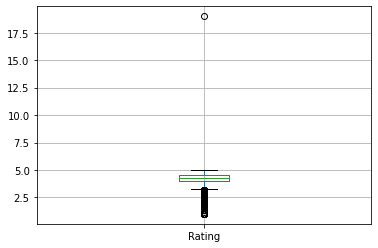

In [505]:
playstore_df.boxplot('Rating')

*As we can see from above boxplot that there lies an outlier* *outside the actual rating limit i.e 5.*\
*So we need to eliminate this outlier inorder to get our data clean.* 

In [506]:
# Checking for an outlier 

playstore_df[playstore_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [507]:
playstore_df.drop((10472),inplace=True) 

In [508]:
playstore_df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


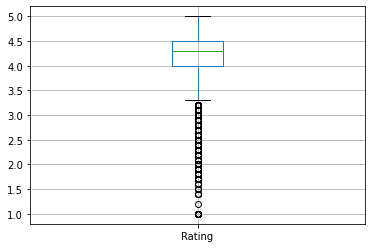

In [509]:
playstore_df.boxplot('Rating')

*Outlier has been eliminated.*

In [510]:
playstore_df['Rating'].fillna('0',inplace=True)

*we have assumed that the Null values are nothing but the apps which are not rated yet.*

In [511]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [512]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10840 non-null  object
 1   Category        10840 non-null  object
 2   Rating          10840 non-null  object
 3   Reviews         10840 non-null  object
 4   Size            10840 non-null  object
 5   Installs        10840 non-null  object
 6   Type            10839 non-null  object
 7   Price           10840 non-null  object
 8   Content Rating  10840 non-null  object
 9   Genres          10840 non-null  object
 10  Last Updated    10840 non-null  object
 11  Current Ver     10832 non-null  object
 12  Android Ver     10838 non-null  object
dtypes: object(13)
memory usage: 1.2+ MB


In [513]:
# changing data type of Reviews and Ratings
playstore_df["Reviews"] = playstore_df["Reviews"].astype(int)

In [514]:
playstore_df["Rating"] = playstore_df["Rating"].astype(float)

In [515]:
playstore_df['Last Updated']=playstore_df['Last Updated'].astype('datetime64[ns]')

In [516]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  object        
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 1.2+ MB


*Finding unique values in Size*

In [517]:
#checking for unique values in Size

playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

*Converting our given data size in a single unit 'KB' and assigning it to a new column as Size_in_Kb*

In [518]:
#Replacing the elements of size and converting it to KB by multiplying the MB value with 1024 by using eval function which returns int after parsing string
def convert_size_to_string(row):
  row=row.lower()

  if row == 'varies with device':
    row = 0
  else:
    if 'm' in row:
      row = row.replace('m','')
      row = eval(row)*1024
    elif 'k' in row:
      row = row.replace('k','')
      row = eval(row)
  return row
        

In [519]:
playstore_df['Size_in_KB']=playstore_df['Size'].apply(convert_size_to_string)

*Finding unique values in Price*

In [520]:
# checking for unique values in Price
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [521]:
# Replacing '+',',' and '$' from installs column and converting it to int using eval
def int_convertion(row):
  row = row.replace(',','')
  row = row.replace('+','')
  row = row.replace('$','')
  row = eval(row)
  return row

In [522]:
playstore_df['Installs'] = playstore_df['Installs'].apply(int_convertion)
playstore_df['Price'] = playstore_df['Price'].apply(int_convertion)

In [523]:
playstore_df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_KB
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,PHOTOGRAPHY,4.4,3158151,53M,100000000,Free,0.0,Everyone,Photography,2018-07-31,6.9.031,4.1 and up,54272.0
6965,C3-C4-PİCASSO-ELYSEE RACİNG,GAME,0.0,12,48M,1000,Free,0.0,Everyone,Arcade,2017-02-12,"1,01",4.0 and up,49152.0
5607,SAMURAI vs ZOMBIES DEFENSE,GAME,4.5,407788,19M,5000000,Free,0.0,Everyone,Action,2013-07-18,3.4.0,2.1 and up,19456.0


*Cleaning the remaining Categorical data*

In [524]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Size_in_KB        0
dtype: int64

In [525]:
# Mode of catagorical values

print(playstore_df['Type'].mode())
print(playstore_df['Current Ver'].mode())
print(playstore_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [526]:
# Filling null values using mode(for catagorical data)

playstore_df['Type'].fillna(str(playstore_df['Type'].mode().values[0]), inplace=True)
playstore_df['Current Ver'].fillna(str(playstore_df['Current Ver'].mode().values[0]), inplace=True)
playstore_df['Android Ver'].fillna(str(playstore_df['Android Ver'].mode().values[0]), inplace=True)

In [527]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Size_in_KB        0
dtype: int64

### *2) **Cleaning** the User reviews dataframe*

In [528]:
# Accessing the Translated_Review

user_reviews_df['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', nan, ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [529]:
# extracting the user dataframe 

user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [530]:
#dropping the null values

user_reviews_df=user_reviews_df.dropna()

In [531]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [532]:
#dropping the duplicates

user_reviews_df=user_reviews_df.drop_duplicates()

## **Merging the two Data Frames**

In [533]:
##copying the data from playstore_df to dataframe 'play_new_df'.
play_new_df=playstore_df.copy()

In [534]:
#copying the data from user_reviews_df to dataframe 'user_new_df'.
user_new_df=user_reviews_df.copy()

In [535]:
# merging two dataframes 'play_new_df' and 'user_new_df' with inner join as new dataframe 'play_user_df'.
play_user_df=pd.merge(play_new_df, user_new_df, how='inner', left_on='App', right_on='App')

In [536]:
play_user_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_KB,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,I hate,Negative,-0.800,0.900000


# **In order to get solution to our problem statements, let's use the Visualization libraries**

### Calculating the percentage of Free vs Paid apps from Playstore data using a piechart

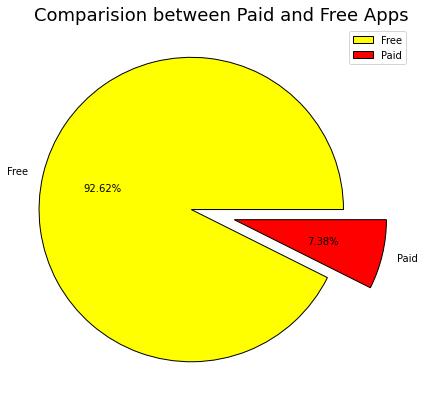

In [537]:
empty_val = playstore_df.sort_values(by=['Rating'], ascending=False)
plt.figure(figsize=(7,7))
labels = empty_val['Type'].value_counts(sort = True).index
sizes = empty_val['Type'].value_counts(sort = True)
colors = ["yellow","red"]
explode = (0.2,0)
plt.pie(sizes, explode= [0.2,0.09],labels=labels,wedgeprops={'edgecolor':'black'},colors=colors,autopct="%.2f%%")
plt.title('Comparision between Paid and Free Apps',fontsize = 18)
plt.axis('off')
plt.legend()
plt.show()

**Findings:**

*From the above chart we can conclude that most of the apps available on the playstore are free which are enjoyed by most of the users.*

Free Apps= 92.62%
Paid Apps= 7.38% 

### Depending on the App Type and number of Installs, App Category

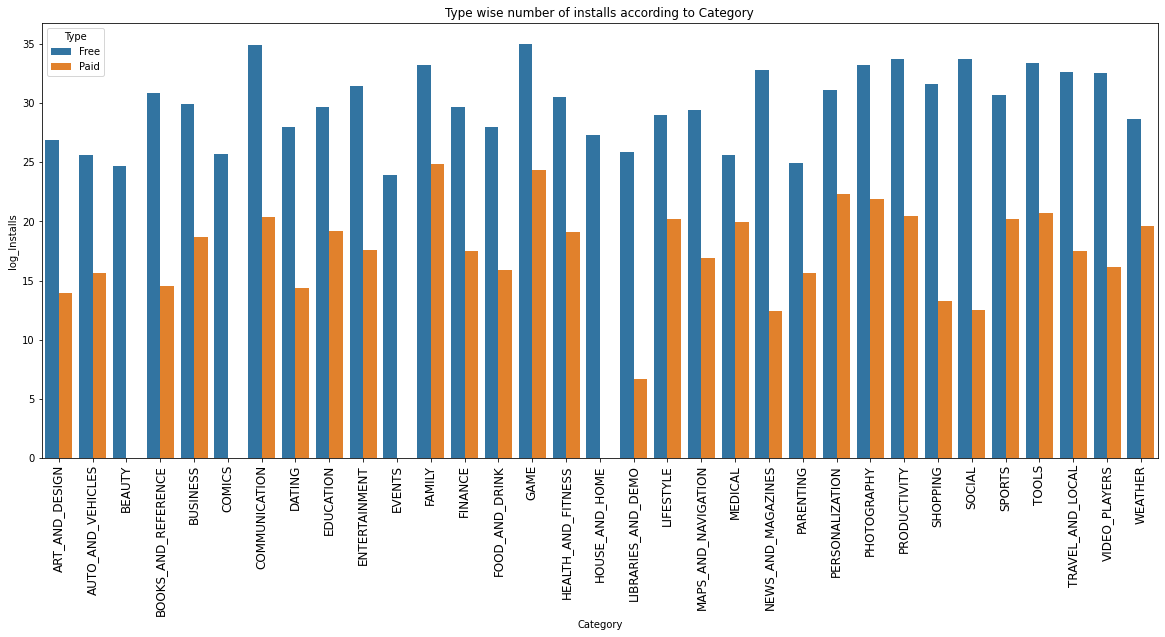

In [538]:
# Extracting 'Type'wise Number of 'Installs' from Playstore_df according to 'Category'
category_type_installs = playstore_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

category_type_installs['log_Installs'] = np.log2(category_type_installs['Installs'])

plt.figure(figsize=(20,8))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Type wise number of installs according to Category")
plotting=sns.barplot(x='Category',y='log_Installs', hue='Type', data=category_type_installs);
plotting.set_xticklabels(plotting.get_xticklabels(), rotation=90, fontsize=12)
plt.show()


**Findings:**

*   From the preceding graph, it is clear that, on average, more people   choose to 'Install' free apps than paid apps.
*   It is clear that the 'Game' 'Category' has the greatest amount of free installations in 'Type' Free. 
*   The Family 'Category' tops the list of 'Type' Paid categories for the largest amount of free 'Installs', according to the above data.






## Most popular Rating with highest number of Apps

---



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



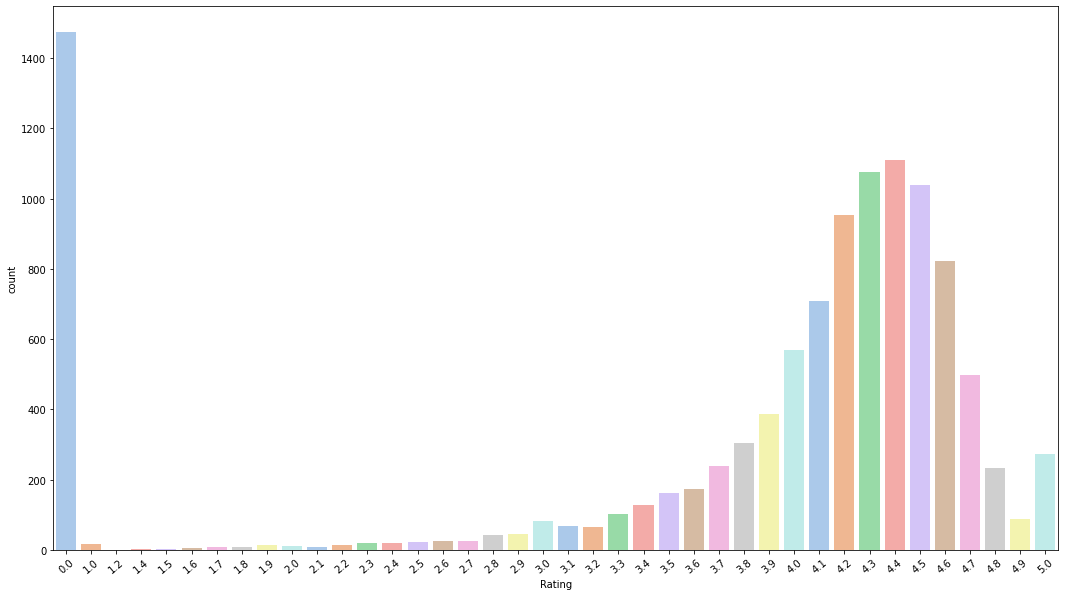

In [539]:
plt.figure(figsize=(18,10))
f = sns.countplot(playstore_df['Rating'], palette= "pastel" )
f.set_xticklabels(f.get_xticklabels(),rotation = 40)
plt.show()

Findings:



*   As indicated in the accompanying graph, 1474 applications have not yet received ratings, and most of them have average ratings of 4.4.




###Let's determine the average rating for each Genre

In [540]:
gen_df=playstore_df.groupby('Genres')['Rating'].mean().reset_index() #groupby Category with average rating
gen_df

,Genres,Rating
0,Action,4.203288
1,Action;Action & Adventure,4.311765
2,Adventure,4.069333
3,Adventure;Action & Adventure,4.423077
4,Adventure;Brain Games,4.600000
...,...,...
114,Video Players & Editors,3.711561
115,Video Players & Editors;Creativity,4.100000
116,Video Players & Editors;Music & Video,4.000000
117,Weather,3.881707


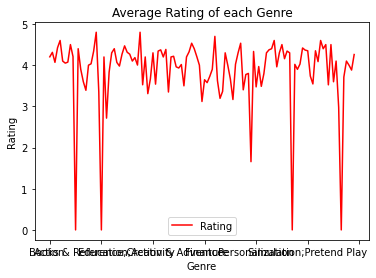

In [541]:
gen_df.plot(kind='line', x='Genres',y='Rating',color='red') #indicating type of graph to line in matplotlib
plt.title('Average Rating of each Genre')#Assigning tittle
plt.xlabel('Genre') #Assigning label to x-axis
plt.ylabel('Rating')
plt.rcParams['figure.figsize'] = (40, 8) #Assigning figure size

In [542]:
#Using scatter plot from Plotly to get more accurate result
fig2=px.scatter(gen_df,x='Genres',y='Rating',color='Genres',title='Average Rating of each Genres',width=1000, height=600)
fig2.show()

**Finding**





*   From the above we may infer scatter plot that the genres "Parenting;Education" have the lowest Average Rating while "Board;Pretend Play" and "Comics; Creativity" have the highest Average Rating of 4.8.














##Content Rating, Depending on the app Type and the number of Installs

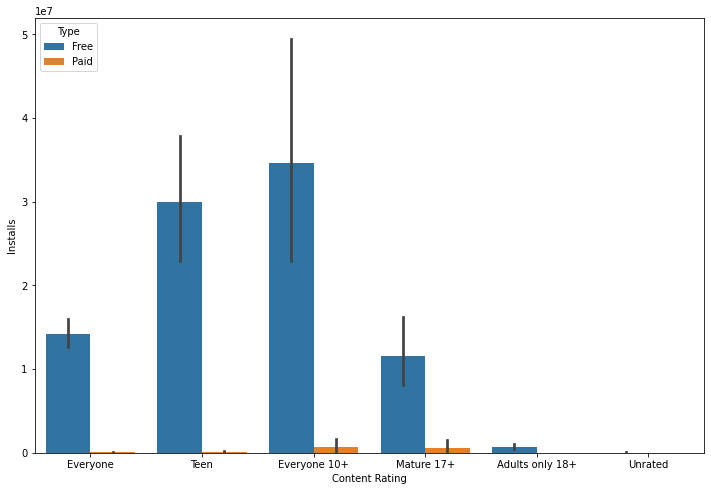

In [543]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=playstore_df)

**Findings:**

*   The graph above shows that, on average, all 'Content Rating' choose to "Install" free apps than paid ones.
*   It is obvious that 'Everyone 10+' has the most installations, both free and paid.


##User favorability based on relationship between Sentiment Polarity and app Type

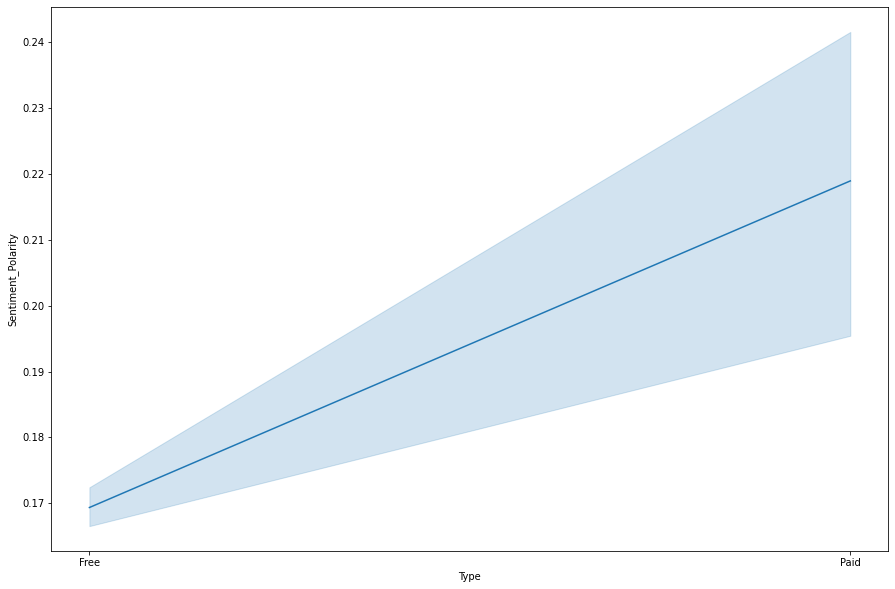

In [544]:
new_df=play_user_df[['Type','Sentiment_Polarity']] #creating new data frame using 'Type','Sentiment_Polarity' from play_user_df
fig=plt.figure(figsize=(15,10))
sns.lineplot(data=new_df,x='Type',y='Sentiment_Polarity') #creating line plot between 'Type','Sentiment_Polarity'

**Findings:**




*   We can infer from the above line plot that when sentiment polarity increases, the polarity of the paid app is higher than the polarity of the free app. This indicates that users are more favourable toward paid apps than free apps.




##Sentiment analysis of the PlayStore's top reviewed categories

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



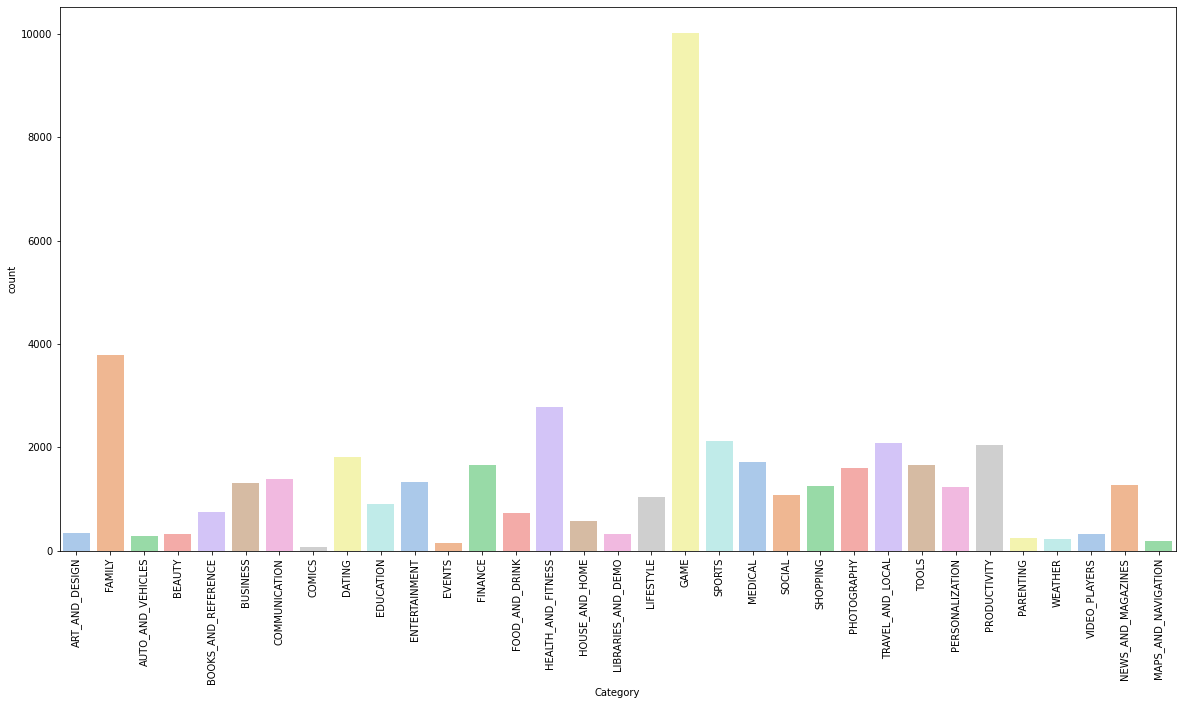

In [545]:
plt.figure(figsize=(20,10))
f = sns.countplot(play_user_df['Category'],palette ="pastel")
f.set_xticklabels(f.get_xticklabels(),rotation = 90)
plt.show()

**Finding:**
*   'GAME', 'FAMILY', 'HEALTH AND FITNESS', 'SPORTS', and 'TRAVEL AND LOCAL' are the top 5 categories, according to the graph above.




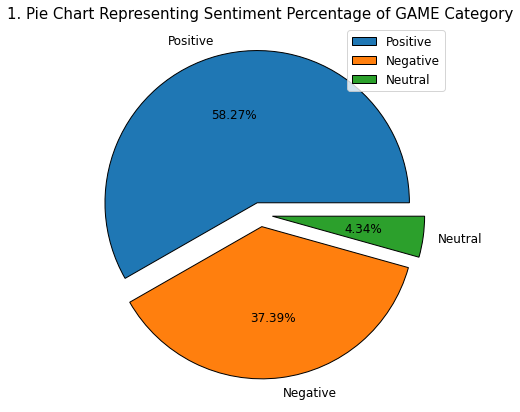

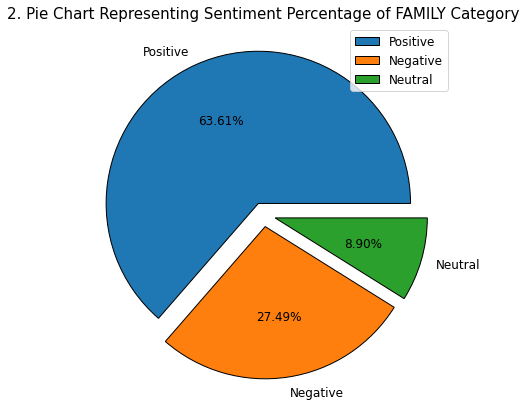

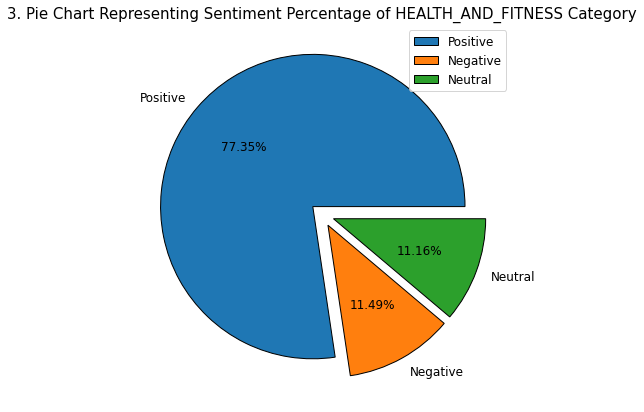

In [546]:
#Taking the list of Top 3 Reviwed App Category
a=['GAME','FAMILY','HEALTH_AND_FITNESS']

#Creating an iterator to iterate through list a
for i in a:                                
  sent_analysis_df=play_user_df[play_user_df['Category']==i]


  s_count = list(sent_analysis_df['Sentiment'].value_counts()) #Creating a list to count sentiment
  labels = 'Positive', 'Negative','Neutral'
  plt.rcParams['font.size'] = 12
  plt.rcParams['figure.figsize'] = (7,7)
  plt.pie(s_count, labels=labels,wedgeprops={'edgecolor':'black'},explode=[0.08, 0.08, 0.08], autopct="%.2f%%")
  plt.title(f'{a.index(i)+1}. Pie Chart Representing Sentiment Percentage of {i} Category', fontsize=15)
  plt.axis('off')
  plt.legend()
  plt.show()

**Findings:**

*   The 'HEALTH AND FITNESS' Category has the highest positive percentage of 77.35%, the lowest negative percentage of 11.494%, and the highest neutral percentage of 11.16%, according to the following graph.

*   Additionally, we discovered that the leading category GAME had a lower positive sentiment proportion (58.27%) than its rival.

*   GAME CATEGORY has received the majority of the critical feedback from the top translated app category. THIS demonstrates that despite having the most translated reviews, the favourable sentiment proportion for the GAME app is lower than that of its competitors.




#**Conclusion**

*  We have now reached the conclusion of our study, which was an analysis of play store app reviews. Just a brief recap of what we did. The first thing we did was remove null values from rows and columns. We also removed duplicate values from datasets. The formatting was then completed for each of the necessary columns in each dataset.
*  From our findings we can presume that the majority of apps that people use are free based on the ratio of free and paid apps available in the PlayStore. This demonstrates how very few people utilise the Play Store to buy apps.
*  We may infer from the data analysis that there are still a significant number of applications that haven't received ratings, and those which have received ratings have an average rating of 4.4.
*  We were able to determine that the Family category had the most Paid app installs while the Game category had the most Free app installs.
*  We can conclude from our analysis that the genres "Parenting; Education" have the lowest Average Ratings, whilst "Board;Pretend Play," and "Comics;Creativity," have the greatest Average Ratings of 4.8 each.
*  We can also draw the conclusion that the majority of apps that people utilise have a "Everyone 10+" as Content Rating. 
*  We discovered that the majority of review sentiment is positive, with neutral reviews making up the smallest percentage of the pie chart. Additionally, when looking at the percentage of sentiments for the top 3 apps, we discovered that the health and fitness category had the most positive sentiments, whilst the game app category received the most negative.


  The information has the potential to provide insights that will help developers better understand client needs and, in turn, aid in the product's commercialization. The app's original ratings and anticipated ratings can be compared in the dataset to see whether the app is performing better or worse than other apps available on the Play Store.